In this notebook, we will make some decisions on which forcing terms that we want to use for our case study and why.


I want to do ssp245 and ssp585

ssp245 is the middle of the road scenario where we expect a radiative forcing of 4.5 W/m^2 by 2100

ssp585 is the extreme top boundary condition where we are still heavily reliant on fossil fuels to develop our economy.

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [3]:
cmipdf = col.df
cmipdf['experiment_id'].unique()

array(['highresSST-present', 'piControl', 'control-1950', 'hist-1950',
       'historical', 'amip', 'abrupt-4xCO2', 'abrupt-2xCO2',
       'abrupt-0p5xCO2', '1pctCO2', 'ssp585', 'esm-piControl', 'esm-hist',
       'hist-piAer', 'histSST-1950HC', 'ssp245', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'piClim-histall', 'hist-piNTCF', 'histSST-piNTCF',
       'aqua-control-lwoff', 'piClim-lu', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'faf-heat-NA0pct', 'ssp370SST-lowCH4', 'piClim-VOC',
       'ssp370-lowNTCF', 'piClim-control', 'piClim-aer', 'hist-aer',
       'faf-heat', 'faf-heat-NA50pct', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'piClim-ghg', 'piClim-anthro', 'faf-all', 'hist-nat', 'hist-GHG',
       'ssp119', 'piClim-histnat', 'piClim-4xCO2', 'ssp370',
       'piClim-histghg', 'highresSST-future', 'esm-ssp585-

In [4]:
data_subset = col.search(table_id="Amon", variable_id = "pr", source_id = ["CanESM5", "HadGEM3-GC31-MM", "GISS-E2-1-H"], experiment_id = ['ssp245', 'ssp585'])
dset_dict = data_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
dset_dict.keys()

dict_keys(['ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.Amon.gn', 'ScenarioMIP.NASA-GISS.GISS-E2-1-H.ssp585.Amon.gn', 'ScenarioMIP.NASA-GISS.GISS-E2-1-H.ssp245.Amon.gn', 'ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn', 'ScenarioMIP.CCCma.CanESM5.ssp245.Amon.gn'])

## CanESM5

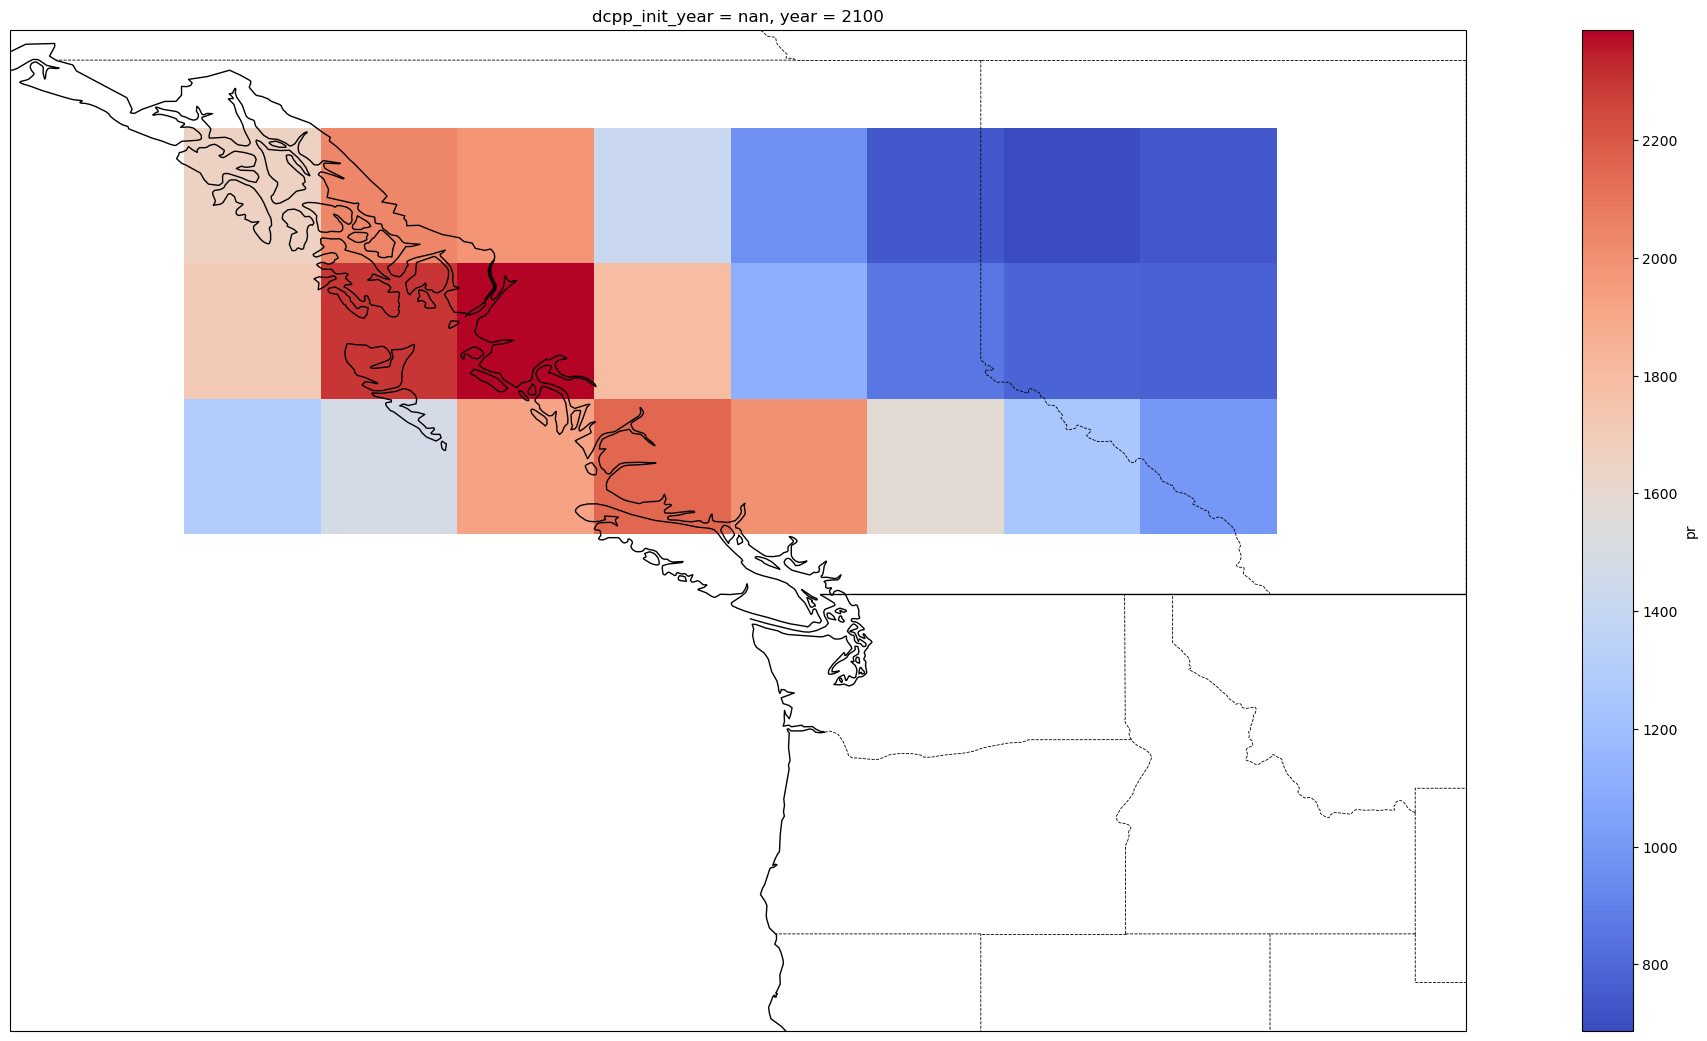

In [10]:
can_dset = dset_dict['ScenarioMIP.CCCma.CanESM5.ssp245.Amon.gn']
can_bc_dset = can_dset.sel(lon = slice(225.,244.6875), lat = slice(48.835241, 59.99702))
data2100_245 = can_bc_dset.sel(time='2100')
precip_data2100_245 = data2100_245.groupby('time.year').mean('time')*86400*365
precip_data2100_245_avg = precip_data2100_245.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



precip_data2100_245_avg.pr.plot(ax=ax,cmap='coolwarm')

(array([ 2.,  5.,  7.,  6., 10., 11.,  3.,  1.,  4.,  1.]),
 array([3.84789309e-05, 4.00995887e-05, 4.17202464e-05, 4.33409004e-05,
        4.49615582e-05, 4.65822159e-05, 4.82028736e-05, 4.98235313e-05,
        5.14441854e-05, 5.30648431e-05, 5.46855008e-05]),
 <BarContainer object of 10 artists>)

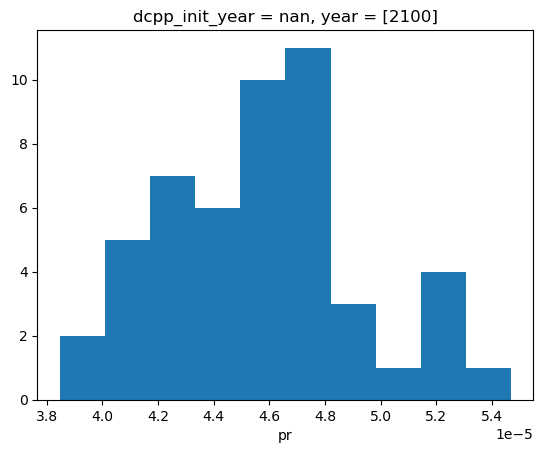

In [12]:
hist_avg = data2100_245.groupby('time.year').mean('time').mean(['lon', 'lat'])
hist_avg.pr.plot.hist()

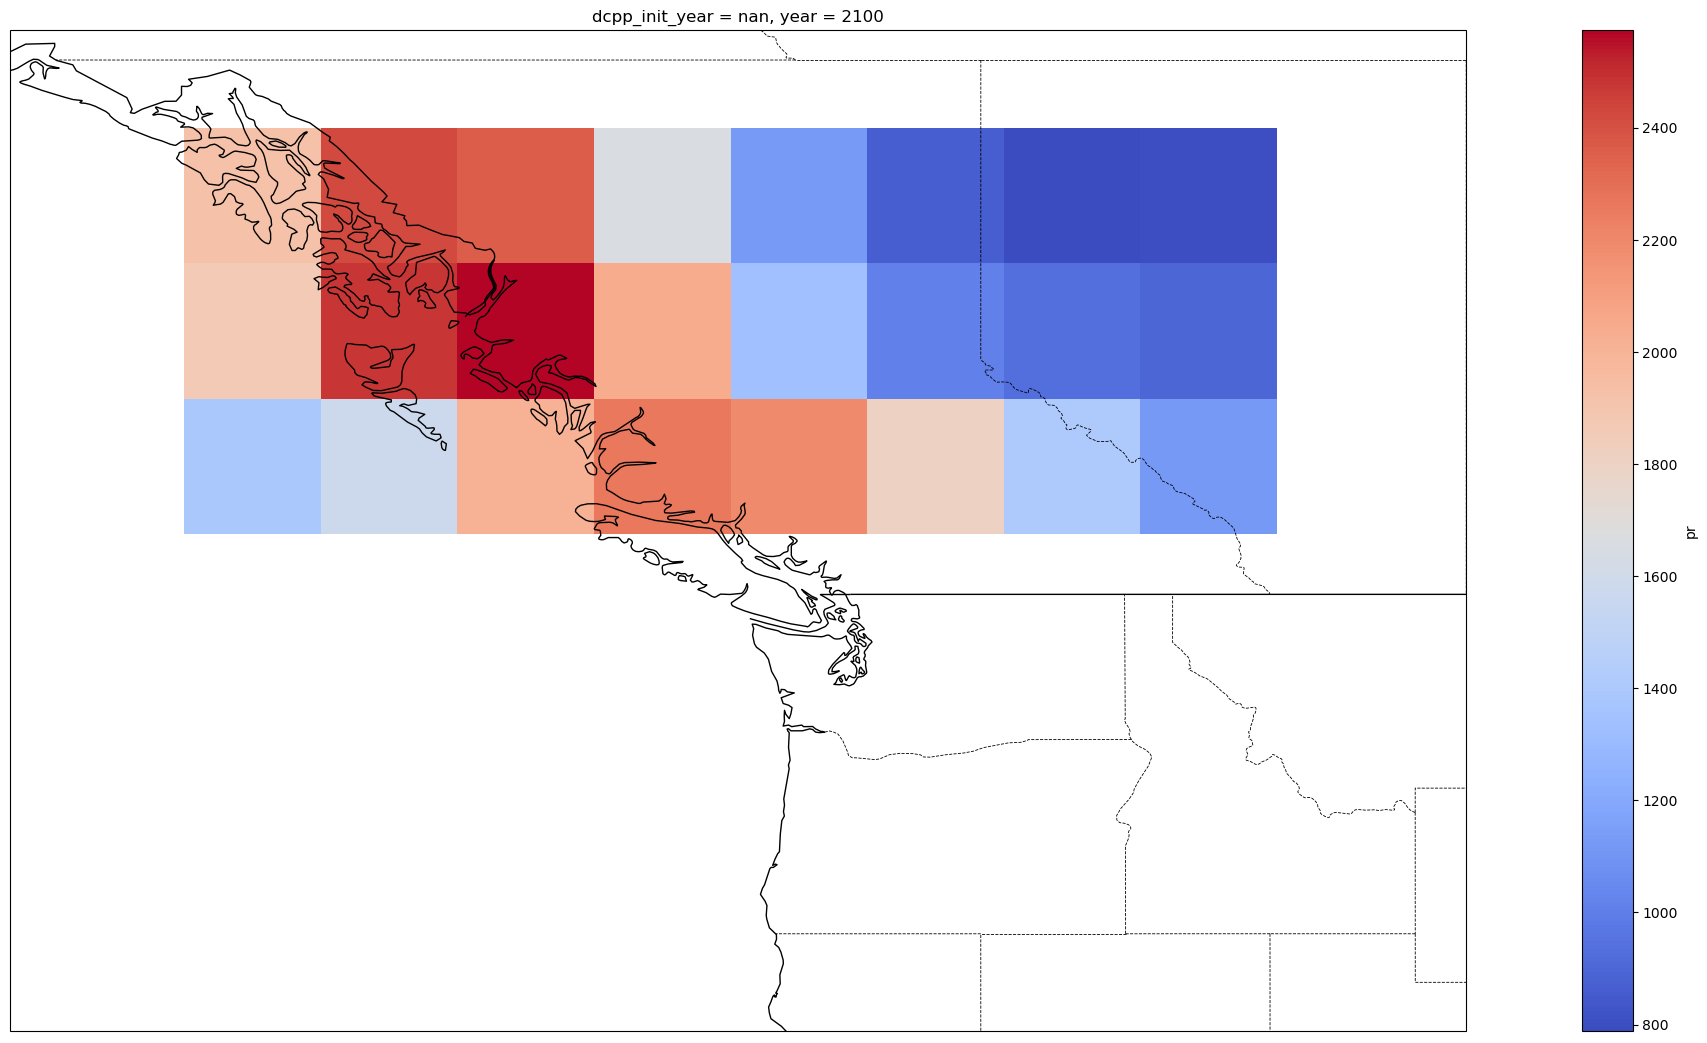

In [14]:
can_dset = dset_dict['ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn']
can_bc_dset = can_dset.sel(lon = slice(225.,244.6875), lat = slice(48.835241, 59.99702))
data2100_585 = can_bc_dset.sel(time='2100')
precip_data2100_585 = data2100_585.groupby('time.year').mean('time')*86400*365
precip_data2100_585_avg = precip_data2100_585.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



precip_data2100_585_avg.pr.plot(ax=ax,cmap='coolwarm')

In [ ]:
test = data2100_585.mean(['lon', 'lat'])*86400*30.4
test.pr.plot()